This notebook is a part of the series about using ProcessOptimizer to guide a gold
mining expedition. For an overview, go to the markdown fil gold_mining.md

We start the story of our gold mining expedition here. We have just gotten the
prospecting permit for a plot of land, and want to figure out how to find the highest
amount of gold. First, we want to figure out where to dig. But since each dig takes a
long time, we want to make as few digs as possible. 

The plot of land is 15.01 by 15.01 kilometers. We encode this as a "Space", which is encodes
where we can draw samples from (do a test dig).

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import ProcessOptimizer

#Setting random seed to ensure reproducible behaviour
np.random.seed(42)

coordinates = [(0, 15.01),(0,15.01)]
space = ProcessOptimizer.space.space.Space(coordinates)

Next, we make a (secret) map of all the gold in the plot of land. We do this by making
a score, which is a function that accepts a coordinate and returns an amount of gold.

We then plot the secret gold map. The yellow areas contain a lot of gold, the green
areas less gold, and the blue areas no gold.

Text(0.5, 1.0, 'Secret gold map')

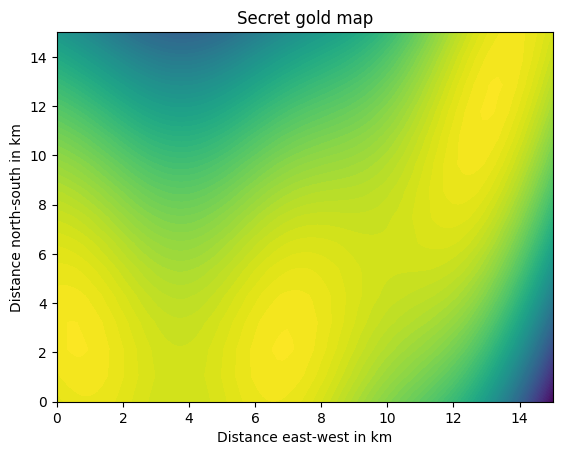

In [143]:
def score(coordinates, silent = False):
    """ Modified Branin-Hoo function. It has three minima with f(x*) = 0.397887 
    More details: <http://www.sfu.ca/~ssurjano/branin.html>
    """
    x = 10-coordinates[0]
    y = coordinates[1]
    gold_found = (309-((y - 5.1 / (4 * np.pi**2) * x ** 2 + 5. / np.pi * x - 6) ** 2 +
                10 * (1 - 1. / (8 * np.pi)) * np.cos(x) + 10))/100
    if not silent:
        print(f"We dug at {coordinates} and found {round(gold_found*10)/10} mg gold.")
    return gold_found

x_list = np.linspace(coordinates[0][0],coordinates[0][1],100)
y_list = np.linspace(coordinates[1][0],coordinates[1][1],15,100)

(x_mesh,y_mesh) = np.meshgrid(x_list,y_list)
score_mesh = [[score((x,y),silent=True) for (x,y) in zip(x_vec,y_vec)] 
              for (x_vec,y_vec) in zip(x_mesh,y_mesh)]
plot =plt.contourf(x_mesh,y_mesh,score_mesh,100)
plot.axes.set_xlabel("Distance east-west in km")
plot.axes.set_ylabel("Distance north-south in km")
plot.axes.set_title("Secret gold map")

We can now start our prospecting. We send our digging team, lead by Mr. Gold Diggerson
to a place in the map, and tell them to dig for gold and report what they found, by
calling the `score()` function. Just to test it, let's start in the middle of the map,
that is, `coordinates = (7.5,7.5)`. 

In [144]:
gold = score((7.5,7.5))

We dug at (7.5, 7.5) and found 2.8 mg gold.


So we found 2.8 mg of gold. We have no idea if this is high or low for the area, but we
want to find the maximum possible number of gold. To this end, we use ProcessOptimizer
to suggest where to dig next. We initialise the in instance of the ProcessOptimizer, 
tell it what space it is to optimize in, and ask it for the first 10 points to try and
dig at.

We then send the digging team out to these 10 positions, have them dig for gold, and
report how much gold they found. Note that we have a negative sign on the amount of
gold when we tell ProcessOptimizer about it. This is because ProcessOptimizer is
necessarily a minimizer, so we need a lower number to be better. This is conveniently
done by simply adding a negative sign.

We then plot the model so far, and the points we have dug at so far.

We dug at [12.7585, 5.2535] and found 2.7 mg gold.
We dug at [2.2515, 14.2595] and found 1.3 mg gold.
We dug at [8.255500000000001, 9.7565] and found 2.6 mg gold.
We dug at [0.7505000000000001, 12.7585] and found 2.0 mg gold.
We dug at [11.2575, 3.7525] and found 2.8 mg gold.
We dug at [3.7525, 8.255500000000001] and found 2.4 mg gold.
We dug at [14.2595, 2.2515] and found 1.4 mg gold.
We dug at [6.7545, 11.2575] and found 2.3 mg gold.
We dug at [5.2535, 0.7505000000000001] and found 3.0 mg gold.
We dug at [9.7565, 6.7545] and found 2.9 mg gold.


array([[<AxesSubplot:xlabel='E-W', ylabel='Dependence'>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='E-W', ylabel='N-S'>,
        <AxesSubplot:xlabel='N-S', ylabel='Dependence'>]], dtype=object)

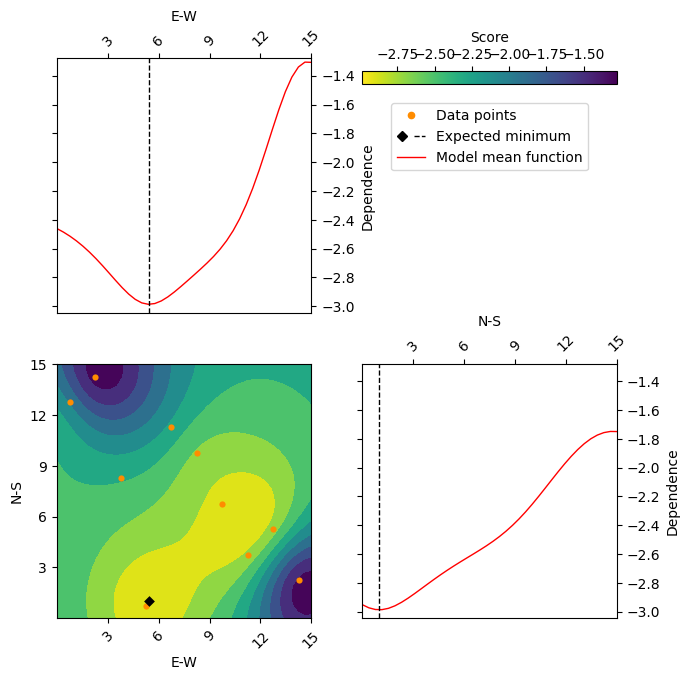

In [145]:
opt = ProcessOptimizer.optimizer.optimizer.Optimizer(dimensions=space)
# Finding the 10 first positions
initial_points = opt.ask(10)
# Digging for gold
gold_found = [-score(coordinates) for coordinates in initial_points]
# Telling the optimiser how uch gold we found
result = opt.tell(initial_points, gold_found)
# plotting
ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"])

The modelled map is the coloured plot in the bottom left corner. We can see that it
it has modelled the large features of the actual gold map, but not the details.

We can also look at the amounts of gold we have found. The highest amount is 3.0 mg at
`(5.3,0.75)`, near the bottom a bit to the left of the middle.

Perhaps this is good enough - We might look at the 3.0 mg of gold and decide to simply
mine there in the future.

Or perhaps we want to continue and find an even better spot. Let's send the digging team
out a few more times.

ProcessOptimizer suggested that we dig at [5.573894862022247, 1.156385151359654]
We dug at [5.573894862022247, 1.156385151359654] and found 3.0 mg gold.
ProcessOptimizer suggested that we dig at [12.67998392395918, 9.972208012415077]
We dug at [12.67998392395918, 9.972208012415077] and found 3.1 mg gold.
ProcessOptimizer suggested that we dig at [12.288346611177868, 9.004398301396387]
We dug at [12.288346611177868, 9.004398301396387] and found 3.0 mg gold.
ProcessOptimizer suggested that we dig at [15.01, 15.01]
We dug at [15.01, 15.01] and found 2.9 mg gold.
ProcessOptimizer suggested that we dig at [0.0, 2.069548208480912]
We dug at [0.0, 2.069548208480912] and found 3.1 mg gold.
ProcessOptimizer suggested that we dig at [12.139661976456123, 15.01]
We dug at [12.139661976456123, 15.01] and found 2.8 mg gold.
ProcessOptimizer suggested that we dig at [13.172841456527706, 10.6791894904294]
We dug at [13.172841456527706, 10.6791894904294] and found 3.1 mg gold.
ProcessOptimizer suggeste

array([[<AxesSubplot:xlabel='E-W', ylabel='Dependence'>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='E-W', ylabel='N-S'>,
        <AxesSubplot:xlabel='N-S', ylabel='Dependence'>]], dtype=object)

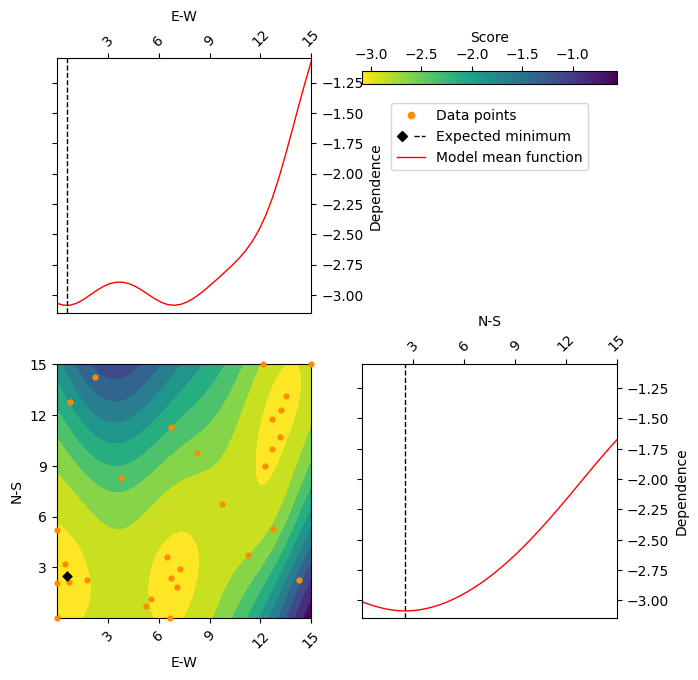

In [146]:
for i in range(20):
    # Finding new dig site.
    new_dig_site=opt.ask()
    # Digging and finding gold.
    gold_found = score(new_dig_site)
    # Telling ProcessOptimizer how much gold we found at the new dig site
    opt.tell(new_dig_site,-gold_found)
# plotting
ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"])

Now, we have a really good model of the true map - The coloured map in the bottom left
looks quite a lot like the "secret gold map" from earlier. And all of the new dig sites
have been in places with a lot of gold, so we have gotten quite a lot of gold in the
process. This shows just how powerful a tool Bayesian Optimisation is to find the best
settings when each experiment is expensive.